## Data Wrangling Tutorial with "Data Science Job Postings" Dataset

In this tutorial, we will walk through the process of cleaning the "Data Science Job Postings" dataset. The dataset contains information about job postings related to data science scraped from the website Glassdoor.  The job postings were pulled from Glassdoor sometime in 2021 and are available in a CSV file on Kaggle via the link below.  More information on the data set can be found on Kaggle.

https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor?resource=download

Here is a summary of the techniques covered in the notebook: 


**1. Importing Libraries and Loading Data:**

   - The notebook begins by importing the necessary libraries, such as pandas and numpy, for data manipulation and analysis. 

   - The data is loaded into a pandas DataFrame using the `read_csv()` function. 

  

**2. Exploratory Data Analysis (EDA):** 

   - The EDA section explores the dataset to gain insights into its structure and content. 

   - Techniques such as checking the dimensions of the dataset, examining the column names and data types, and viewing the first few rows of data are employed. 

   - Descriptive statistics, including count, mean, min, & max are calculated for numerical columns. 

   - Visualizations, such as histograms, box plots, and scatter plots, are used to analyze the distribution and relationships between variables. 

  

**3. Handling Missing Values:** 

   - The notebook demonstrates various methods to handle missing values in the dataset.

   - Missing values are addressed through techniques like dropping rows/columns, replacing with static values, and using interpolation techniques. 

  

**4. Handling Duplicate Data:** 

   - The notebook discusses how to identify and handle duplicate data in the dataset. 

   - Techniques such as identifying duplicate rows using `duplicated()` function, counting the number of duplicates, and removing duplicate rows using `drop_duplicates()` function are utilized. 

  

**5. Data Transformation and Standardization:** 

   - The notebook covers techniques for transforming and standardizing data to a consistent format. 

   - Techniques like converting data types, removing leading/trailing whitespaces, and handling inconsistent string formatting are demonstrated. 

   - Examples of using functions like `str.lower()`, `str.strip()`, and `str.replace()` are provided. 

  

**6. Handling Outliers:** 

   - The notebook explores techniques to identify and handle outliers in numerical data. 

   - Methods like calculating z-scores, setting thresholds based on percentiles, and visualizing box plots and scatter plots are used to identify outliers. 

   - Techniques for handling outliers, such as removing outliers or capping/extending values using percentiles, are discussed. 

  

**7. Data Validation and Quality Assurance:**

   - The notebook covers techniques for validating data and ensuring data quality. 

   - Techniques like checking for inconsistent data using regular expressions, validating numerical ranges, and cross-validating data using external sources are demonstrated.

### Step 1: Loading the Dataset

First, let us start by importing the libraries we will be using in this tutorial.  We will start with pandas and numpy, which are two very typical data analysis libraries.  We will read the data file into memory and load the data into a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np

Read the file using the "read_csv" function in the pandas library and store in a dataframe called `ds_df` (data science data frame).

In [2]:
ds_df = pd.read_csv('data files/Uncleaned_DS_jobs.csv')

Inspect the last five rows of the data set using the tail() function.

In [3]:
ds_df.tail()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1
671,671,Data Scientist,$105K-$167K (Glassdoor est.),Description\n\nThe Data Scientist will be part...,2.7,1-800-Flowers\n2.7,"New York, NY","Carle Place, NY",1001 to 5000 employees,1976,Company - Public,Wholesale,Business Services,$1 to $2 billion (USD),-1


### Step 2: Exploring the Dataset

Before we begin cleaning the data, it's important to understand its structure and identify any potential issues. Let us explore the dataset.

We noticed an `index` column, which will not be of any use to us in our analysis; let us remove this before continuing on.  We can do this with the df.drop() function in pandas; we use `inplace=True` so that the dataframe will save this change for the rest of the notebook.

In [4]:
ds_df.drop('index', axis=1, inplace=True)

Check the dimensions of the data set.

In [5]:
print('Dataset Dimensions:', ds_df.shape)

Dataset Dimensions: (672, 14)


Check the column names to see what kind of data we can analyze.  We can also sort them using the `sort_values()` function so it is a little easier to see what is available.

In [6]:
print('Column Names:\n')
for i in ds_df.columns.sort_values():
    print(i)

Column Names:

Company Name
Competitors
Founded
Headquarters
Industry
Job Description
Job Title
Location
Rating
Revenue
Salary Estimate
Sector
Size
Type of ownership


In [7]:
print(ds_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 73.6+ KB
None


### Step 3: Remove duplicate rows

Since we don't have to deal with missing values, let us see if there are any duplicate records and remove those. We can do this using the `df.duplicated()` function and summing to get the count of duplicate rows.

In [8]:
ds_df.duplicated().sum()

13

Not too many duplicates, but let us remove them by running `df.drop_duplicates()`.

In [9]:
ds_df.drop_duplicates(inplace=True)

Print the shape to see the new dataframe dimensions and confirm the thirteen duplicate rows are gone.

In [10]:
ds_df.shape

(659, 14)

### Step 4: Cleaning and Transforming Data

Now, let us clean and transform the data to ensure consistency and uniformity.

Review the first five rows of data to see if there are any manipulations or clean up steps we should take before proceeding.

In [11]:
ds_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


We can print the column out to confirm the '\n#.#' string appears on every row.

In [12]:
ds_df['Company Name']

0               Healthfirst\n3.1
1                   ManTech\n4.2
2            Analysis Group\n3.8
3                   INFICON\n3.5
4        Affinity Solutions\n2.9
                 ...            
667                TRANZACT\n3.6
668                         JKGT
669                   AccessHope
670    ChaTeck Incorporated\n5.0
671           1-800-Flowers\n2.7
Name: Company Name, Length: 659, dtype: object

We split on the '\n' string and expand the columns so it splits them into two.

In [13]:
print(ds_df['Company Name'].str.split('\n', expand=True))

                        0     1
0             Healthfirst   3.1
1                 ManTech   4.2
2          Analysis Group   3.8
3                 INFICON   3.5
4      Affinity Solutions   2.9
..                    ...   ...
667              TRANZACT   3.6
668                  JKGT  None
669            AccessHope  None
670  ChaTeck Incorporated   5.0
671         1-800-Flowers   2.7

[659 rows x 2 columns]


Then we grab the company name by only selecting the first element, which in Python starts with `[0]`.

In [14]:
ds_df['Company Name'] = ds_df['Company Name'].str.split('\n', expand=True)[0]

For all of our transformations, we want to print out the results of our work to confirm our code is performing the transformations as we expect.

In [15]:
ds_df['Company Name']

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 659, dtype: object

Let us now look at the Industry column.

In [16]:
ds_df['Industry'].value_counts()[0:10]

Industry
Biotech & Pharmaceuticals                  66
IT Services                                61
-1                                         60
Computer Hardware & Software               56
Aerospace & Defense                        46
Enterprise Software & Network Solutions    43
Consulting                                 38
Staffing & Outsourcing                     36
Insurance Carriers                         28
Internet                                   27
Name: count, dtype: int64

Let us transform the -1 with 'Unknown Industry' using the `str.replace()` function.

In [17]:
ds_df['Industry'] = ds_df['Industry'].str.replace('-1', 'Unknown Industry')

Let us confirm the transformation was successful.  We can just look at the top ten industries to confirm it worked.

In [18]:
ds_df['Industry'].value_counts()[0:10]

Industry
Biotech & Pharmaceuticals                  66
IT Services                                61
Unknown Industry                           60
Computer Hardware & Software               56
Aerospace & Defense                        46
Enterprise Software & Network Solutions    43
Consulting                                 38
Staffing & Outsourcing                     36
Insurance Carriers                         28
Internet                                   27
Name: count, dtype: int64

Next, let us look at the Salary Estimate column.

In [19]:
ds_df['Salary Estimate'].value_counts()[0:10]

Salary Estimate
$75K-$131K (Glassdoor est.)     32
$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     28
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
Name: count, dtype: int64

Our best bet here is to do a regular expression (regex) to strip out any of the non-numeric values, then create two columns with the minimum and maximum salaries for each row.

In [20]:
ds_df['Min Salary'] = ds_df['Salary Estimate'].str.extract('\$(\d+)K').astype(float)*1000

Do the same with the Maximum Salary, but this time pulling out the second element in the salary range to get the maximum salary.  We also multiply this number by 1000.

In [21]:
ds_df['Max Salary'] = ds_df['Salary Estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')[1].astype(float)*1000

Print out a few elements from each newly created column to confirm the transformations were successful.

In [22]:
print(ds_df[['Min Salary', 'Max Salary']])

     Min Salary  Max Salary
0      137000.0    171000.0
1      137000.0    171000.0
2      137000.0    171000.0
3      137000.0    171000.0
4      137000.0    171000.0
..          ...         ...
667    105000.0    167000.0
668    105000.0    167000.0
669    105000.0    167000.0
670    105000.0    167000.0
671    105000.0    167000.0

[659 rows x 2 columns]


Now we can do analysis on the salary ranges more effectively.  Let us add an Average Salary column to the data set so we can slice by Minimum, Maximum, and Average Salary by job.

In [23]:
ds_df['Average Salary'] = ds_df[['Min Salary', 'Max Salary']].mean(axis = 1)

Print out a few sample values to confirm the average calculation performed on every row and looks good.

In [24]:
ds_df['Average Salary']

0      154000.0
1      154000.0
2      154000.0
3      154000.0
4      154000.0
         ...   
667    136000.0
668    136000.0
669    136000.0
670    136000.0
671    136000.0
Name: Average Salary, Length: 659, dtype: float64

Now that we have salary covered, let us look at the Size column by printing the value counts.

In [25]:
ds_df['Size'].value_counts()

Size
51 to 200 employees        134
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        84
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
Unknown                     17
-1                          16
Name: count, dtype: int64

We notice that 'employees' is repeated on every line and there are a few -1s that we should take care of.

In [26]:
ds_df['Size'] = ds_df['Size'].str.replace('-1', 'Unknown')

Then we will remove 'employees' from all of the entries so it looks a little better.

In [27]:
ds_df['Size'] = ds_df['Size'].str.split(' employees', expand=True)[0]

Print out the value counts now to see if the transformations were successful.

In [28]:
ds_df['Size'].value_counts()

Size
51 to 200        134
1001 to 5000     104
1 to 50           86
201 to 500        84
10000+            80
501 to 1000       77
5001 to 10000     61
Unknown           33
Name: count, dtype: int64

Let us look at the year the company was founded and use this to calculate how old the company is.  To start, we should see if there are any strange values in the Founded column by also looking value counts.

In [29]:
ds_df['Founded'].value_counts()[0:10]

Founded
-1       107
 2012     34
 2011     24
 2010     22
 1996     22
 1999     22
 2015     21
 2006     16
 2013     16
 2000     15
Name: count, dtype: int64

This column is an integer and we want to use it to perform a simple calculation to subtract it from the current year of 2023 so we replace the -1 with a 0.

In [30]:
ds_df['Founded'] = ds_df['Founded'].replace(-1, 0)

We can build a simple lambda function to say if the year = 0 then just set the age of the company to 0, otherwise subtract it from 2023 to get the number of years of the company.

In [31]:
ds_df['Age of Company'] = ds_df['Founded'].apply(lambda x: 2023-x if x != 0 else x)

Print the results to see if the transformations worked.

In [32]:
ds_df['Age of Company'].value_counts()[0:10]

Age of Company
0     107
11     34
12     24
13     22
27     22
24     22
8      21
17     16
10     16
23     15
Name: count, dtype: int64

For the sake of time and brevity, we will perform a few more clean up items before we try visualizing the data.  Let us look at the Ratings column and see if anything can be transformed there.

In [33]:
print(ds_df['Rating'].value_counts().reset_index()[0:10])

   Rating  count
0     3.5     58
1     4.0     41
2     3.3     41
3     3.9     40
4    -1.0     39
5     3.8     39
6     3.7     38
7     5.0     36
8     4.5     32
9     3.6     31


Let us impute a NULL or empty value since the data type is a float; this is the safest bet to accurately represent that the Ratings data is missing for those rows and will not affect the min, max, and average calculations.

In [34]:
ds_df['Rating'] = ds_df['Rating'].replace(-1, np.NaN)

Show the average rating now that we've replaced the -1s with NULL.

In [35]:
print('The average Rating after replacing -1 with NULL is:', ds_df['Rating'].mean().astype(str))

The average Rating after replacing -1 with NULL is: 3.8812903225806448


Next up is taking a look at the job locations and seeing if there is any strange or missing data there.

In [36]:
ds_df['Location'].value_counts()

Location
San Francisco, CA    58
New York, NY         50
Washington, DC       26
Boston, MA           24
Chicago, IL          22
                     ..
Lehi, UT              1
Culver City, CA       1
Lake Oswego, OR       1
New Orleans, LA       1
Irwindale, CA         1
Name: count, Length: 207, dtype: int64

Let us start by pulling out just the state abbreviations and disregarding the cities.

In [37]:
ds_df['Location'].apply(lambda x: x.split(",")[-1]).value_counts()

Location
 CA              154
 VA               89
 MA               62
 NY               52
 MD               40
 IL               30
 DC               26
 TX               17
 WA               16
 OH               14
 PA               12
 MO               12
United States     11
 NJ               10
 CO               10
 NC                9
 GA                9
 TN                8
 FL                8
 OK                6
 WI                6
Remote             5
 IN                5
 MI                5
 CT                4
 AL                4
 MN                4
 AZ                4
 NE                3
 IA                3
 RI                2
New Jersey         2
 SC                2
 OR                2
 UT                2
Utah               2
 NH                2
 MS                1
 LA                1
 KS                1
Texas              1
 DE                1
California         1
 WV                1
Name: count, dtype: int64

Now we see that a few of the job locations have the full state name or USA in them so we will create a simple function to deal with these.

In [38]:
ds_df['Job State'] = ds_df['Location'].apply(lambda x: x.split(",")[-1].strip())

We will keep it simple and just change the values to ones that seem appropriate.

In [39]:
ds_df['Job State'] = ds_df['Job State'].replace(['California', 'New Jersey', 'Texas', 
                                                 'Utah', 'United States', 'Remote'],
                                                      ['CA', 'NJ', 'TX', 'UT', 'USA', 'All'])

Print out the 'Job State' column to confirm our transformations were successful.

In [40]:
ds_df['Job State'].value_counts()[0:5]

Job State
CA    155
VA     89
MA     62
NY     52
MD     40
Name: count, dtype: int64

A few more things to clean up and then we can save the data set, then do some quick visualizations to bring it all together.  Let's start by looking at the Job Titles in each of the descriptions and see if we can do some quick work on them.

We start by looking at what the counts are for the Job Title column.

In [41]:
ds_df['Job Title'].value_counts()[0:8]

Job Title
Data Scientist                                326
Data Engineer                                  26
Senior Data Scientist                          19
Machine Learning Engineer                      15
Data Analyst                                   12
Senior Data Analyst                             6
Data Scientist - TS/SCI FSP or CI Required      4
Data Science Software Engineer                  4
Name: count, dtype: int64

It looks like the vast majority of the postings use the first five titles or some form of them.  We can create a simple function to look for specific text in the title, transform the title, and then save it back to the Job Title column.

In [42]:
def job_title_transformation(title):
    title = title.lower()

    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'machine learning' in title:
        return 'Machine Learning Engineer'
    elif 'director' in title:
        return 'Director'
    elif 'manager' in title:
        return 'Manager'
    elif 'vice president' in title:
        return 'Vice President'
    elif 'analyst' in title:
        return 'Data Analyst'
    else:
        return 'Unknown Job Title'

Apply the function to the Job Title column and create a new column called Job Title Transformed.

In [43]:
ds_df['Job Title Transformed'] = ds_df['Job Title'].apply(job_title_transformation)

Confirm the new column looks as expected.

In [44]:
ds_df['Job Title Transformed'].value_counts()

Job Title Transformed
Data Scientist               444
Unknown Job Title             68
Data Analyst                  55
Data Engineer                 46
Machine Learning Engineer     35
Manager                        7
Director                       3
Vice President                 1
Name: count, dtype: int64

We see that there only 68 jobs that are in that miscellaneous bucket so it makes logical sense to bucket them all.  

The last step in the transformation process: uncover what the most popular skills in the Job Description column.  We need to create boolean columns that indicate whether any of the skills shows up in the job description with a simple function.

In [45]:
def create_flag_columns(df, columns):
    for column in columns:
        df[column.title()] = df['Job Description'].str.lower().str.contains(column).astype(int)

In [46]:
columns = ["python", "excel", "tableau", "power bi", "aws", "sql", "spark"]
create_flag_columns(ds_df, columns)

We pass the DataFrame ds_df and a list of column names columns to the create_flag_columns function which creates 'flag' columns for each specified column in ds_df, indicating whether the corresponding keyword is present in the respective column's values.  We can print one of the columns to confirm it worked successfully.

In [47]:
ds_df['Python'].value_counts()

Python
1    479
0    180
Name: count, dtype: int64

Let us check to make sure all of the new columns were created.

In [48]:
ds_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Average Salary', 'Age of Company',
       'Job State', 'Job Title Transformed', 'Python', 'Excel', 'Tableau',
       'Power Bi', 'Aws', 'Sql', 'Spark'],
      dtype='object')

Let us print the first five rows of the data frame as one final check to confirm our transformations have been applied successfully.

In [49]:
ds_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age of Company,Job State,Job Title Transformed,Python,Excel,Tableau,Power Bi,Aws,Sql,Spark
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993,Nonprofit Organization,...,30,NY,Data Scientist,0,0,0,0,1,0,0
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968,Company - Public,...,55,VA,Data Scientist,0,0,0,0,0,1,0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981,Private Practice / Firm,...,42,MA,Data Scientist,1,1,0,0,1,0,0
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000,Company - Public,...,23,MA,Data Scientist,1,1,0,0,1,1,0
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998,Company - Private,...,25,NY,Data Scientist,1,1,0,0,0,1,0


In this step, we applied various cleaning and transformation operations to specific columns.

### Step 5: Saving the Cleaned Dataset

Let us save the cleaned dataset to a new file for further analysis.  We will save the cleaned dataset to a new CSV file called 'Glassdoor_DS_Jobs_Final.csv'.

In [50]:
ds_df.to_csv('data files/Glassdoor_DS_Jobs_Final.csv', index=False)

Congratulations! You have successfully completed the data cleaning process for the "Data Science Job Postings" dataset. The cleaned dataset can now be used for further analysis and visualization.

Remember that data cleaning is an iterative process, and you can apply additional cleaning techniques based on the specific requirements of your analysis.

### Step 6: Load the Cleaned Dataset 

Let us load the cleaned dataset so we can perform simple visualizations to showcase our data engineering efforts.  Instead of loading the original data file, now we can load the cleaned data set we saved in the previous step.

In [51]:
ds_vis_df = pd.read_csv('data files/Glassdoor_DS_Jobs_Final.csv')

Confirm the data set looks like the one we just saved by checking the first few rows.

In [52]:
ds_vis_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age of Company,Job State,Job Title Transformed,Python,Excel,Tableau,Power Bi,Aws,Sql,Spark
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993,Nonprofit Organization,...,30,NY,Data Scientist,0,0,0,0,1,0,0
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968,Company - Public,...,55,VA,Data Scientist,0,0,0,0,0,1,0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981,Private Practice / Firm,...,42,MA,Data Scientist,1,1,0,0,1,0,0
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000,Company - Public,...,23,MA,Data Scientist,1,1,0,0,1,1,0
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998,Company - Private,...,25,NY,Data Scientist,1,1,0,0,0,1,0


### Step 7: Create some visualizations to summarize the data

Let us do some simple visualizations to summarize the data and draw some simple conclusions.  Let's start by importing the libraries we will need to create the visualizations.

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

To start, let us create a simple function to generate a bar plot with to showcase which skills are being called out, based on the boolean columns we created in the last step of the data engineering process.

In [54]:
def plot_skill_appearances(df, skill_columns):
    counts_1 = [len(df.loc[df[column] == 1, column]) for column in skill_columns]
    counts_0 = [len(df.loc[df[column] == 0, column]) for column in skill_columns]

    x = skill_columns
    y1 = counts_1
    y2 = counts_0

    sns.set()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y1, color='b')
    sns.barplot(x=x, y=y2, bottom=y1, color='r')
    plt.xlabel('Technical Skill')
    plt.ylabel('Skill Appearances')
    plt.show()

The function plot_skill_appearances takes two parameters: `df` (the DataFrame) and `skill_columns` (a list of skill columns to plot).  Then we call the function on the data frame to show the bar graph with the skills columns we generated earlier.

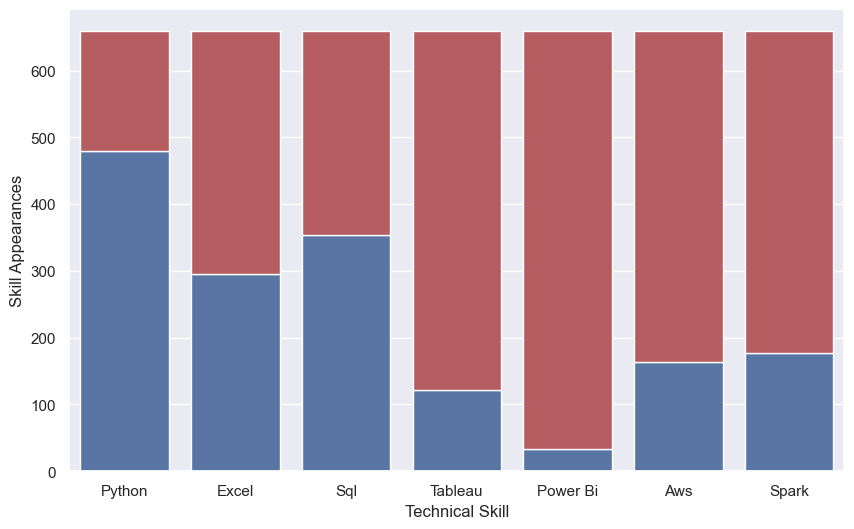

In [55]:
skills = ['Python', 'Excel', 'Sql', 'Tableau', 'Power Bi', 'Aws', 'Spark']
plot_skill_appearances(ds_vis_df, skills)

##### What sort of conclusions can you draw from this output?  Feel free to jot some down.

Next, let us look at how the job titles are distributed in this data set.  We can do a simple pie chart to demonstrate the percentage of each job title.

In [56]:
def plot_job_title_distribution(df, column):
    category_distribution = df[column].value_counts(normalize=True)

    plt.figure(figsize=(8, 8))
    sns.set()
    category_distribution.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Job Title Distribution')
    plt.ylabel('')
    plt.show()

The function plot_category_distribution takes two parameters: df (the DataFrame) and column_name (the column containing the job categories to visualize).  Let us call the function and see what the pie chart looks like.

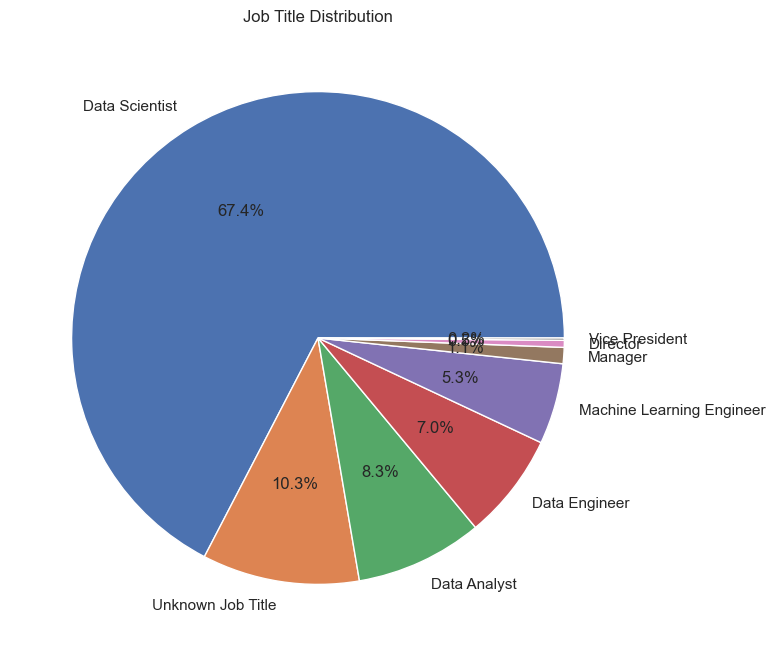

In [57]:
plot_job_title_distribution(ds_vis_df, 'Job Title Transformed')

#### What kinds of conclusions can be drawn from this?  Feel free to jot them down.

Next, let us plot the top ten industries that appear in the Glassdoor results.

In [58]:
def plot_top_industries(df, n=10):
    top_industries = df['Industry'].value_counts().nlargest(n).index
    data_filtered = df[df['Industry'].isin(top_industries)]

    plt.figure(figsize=(12, 6))
    sns.countplot(data=data_filtered, y='Industry', order=top_industries)
    plt.title(f'Top {n} Industries')
    plt.xlabel('Count')
    plt.ylabel('Industry')
    plt.show()

The function `plot_top_industries` takes a DataFrame (df) and an optional parameter n (defaulted to 10) as input.  We can call the function on the dataframe.

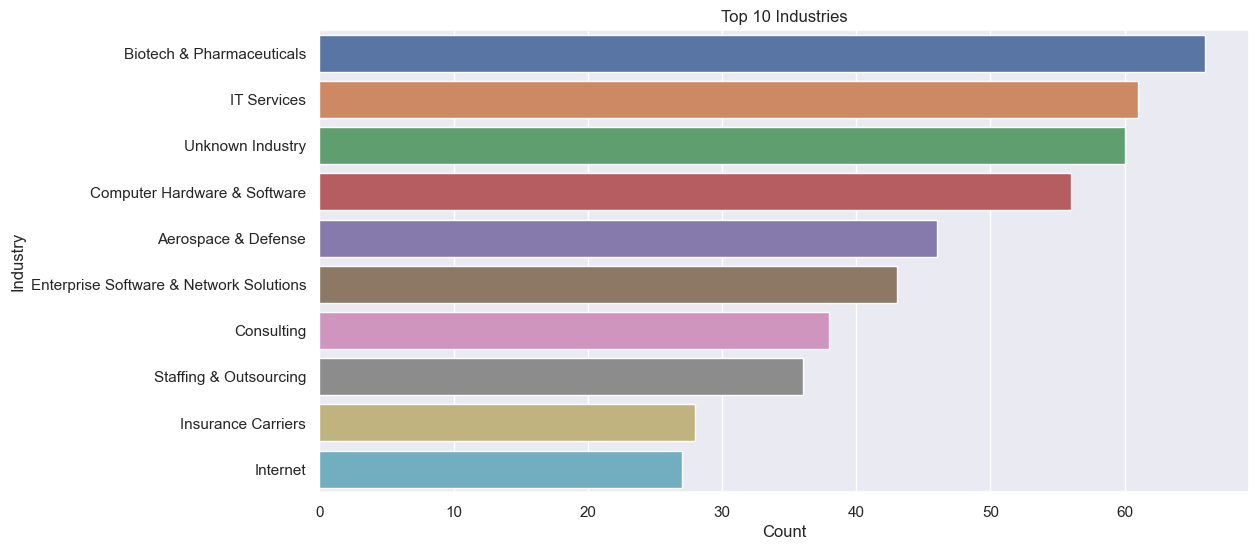

In [59]:
plot_top_industries(ds_vis_df)

#### What kinds of conclusions can be drawn from this visualization?  Jot some down.

Next, let us take a look at the salary information and get an idea of the distribution of salaries.

In [60]:
def plot_salary_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Average Salary', kde=True)
    plt.title('Distribution of Salaries')
    plt.xlabel('Average Salary')
    plt.ylabel('Count')
    plt.show()

The function plot_salary_distribution takes a DataFrame (df) as input.

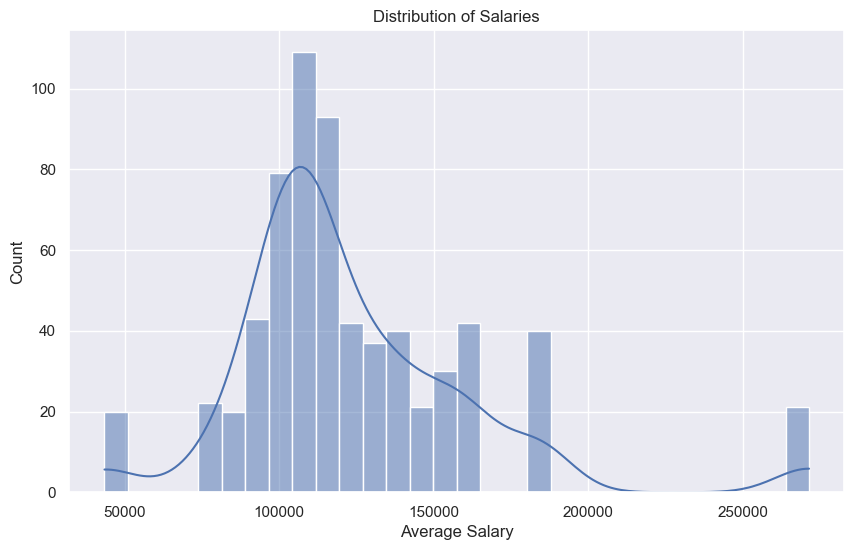

In [61]:
plot_salary_distribution(ds_vis_df)

#### What sorts of conclusions can be drawn from the visualization above?  Jot down some ideas.

Next, let us plot the average salary by job title, using the transformed job title column we created earlier in tutorial.

In [62]:
def plot_average_salary_by_title(df):
    filtered_data = df[df['Job Title Transformed'] != 'Unknown Job Title']
    sorted_data = filtered_data.sort_values('Average Salary', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=sorted_data, x='Job Title Transformed', y='Average Salary')
    plt.title('Average Salary by Job Title')
    plt.xlabel('Job Title')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.show()

The function plot_average_salary_by_title takes a DataFrame (df) as input.

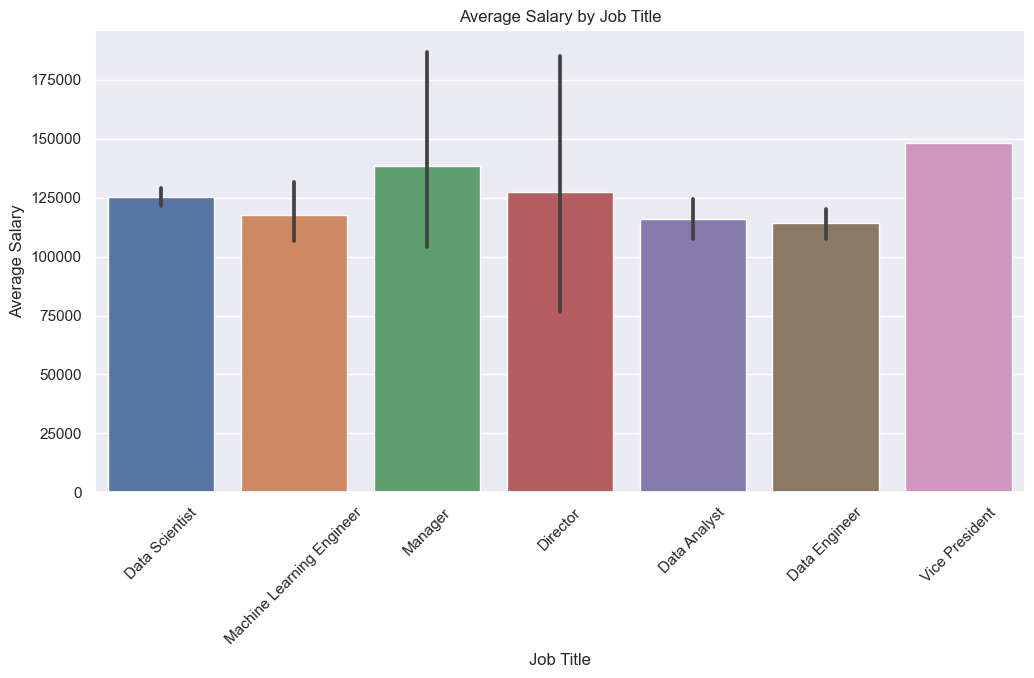

In [63]:
plot_average_salary_by_title(ds_vis_df)

#### What sort of conclusions can be drawn from this graph?  Jot some down.

Finally, let us compare the average salary by the size of the company.

In [64]:
def plot_average_salary_by_size(data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='Size', y='Average Salary', order=['1 to 50', '51 to 200', '201 to 500', '501 to 1000', '1001 to 5000', '5001 to 10000', '10000+'])
    plt.title('Average Salary by Company Size')
    plt.xlabel('Company Size')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.show()

The function plot_average_salary_by_size takes a DataFrame (df) as input.

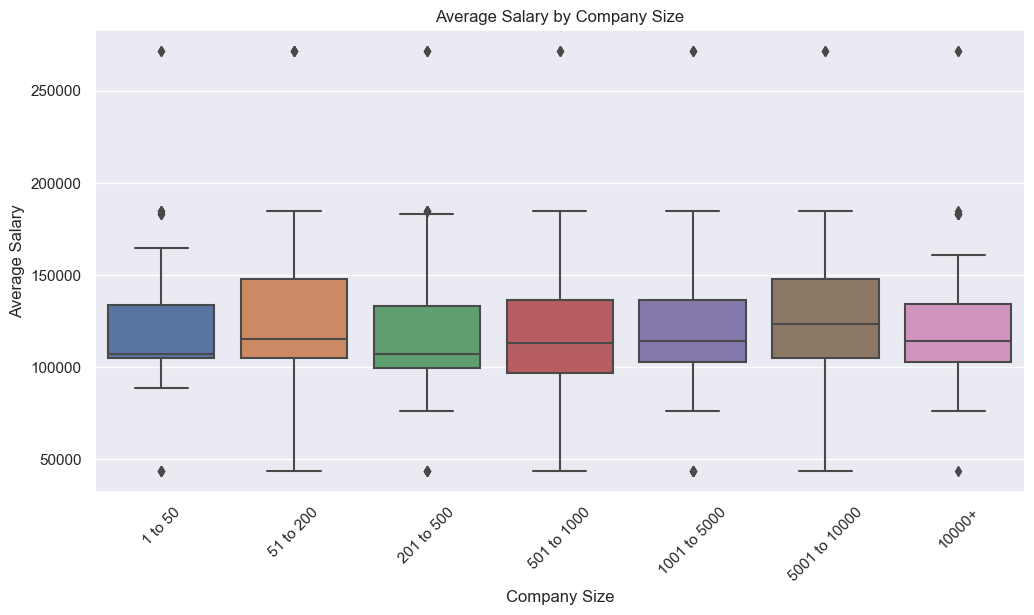

In [65]:
plot_average_salary_by_size(ds_vis_df)

There are unlimited ways to visualize this data and draw conclusions from the data set.  These are just some samples of graphs that can be created using the cleaned up data set.  Take the time to practice some on your own and develop your own analysis!